# Música nigeriana extraída de Spotify: un análisis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Text(0.5, 1.0, 'Top genres')

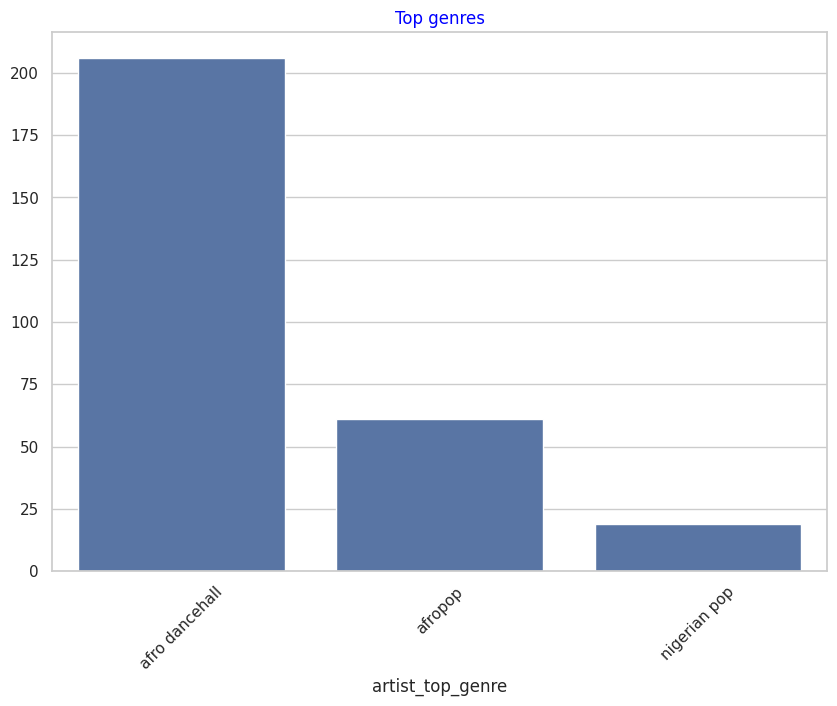

In [2]:
sns.set(style="whitegrid")
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [3]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


## Introducción
El agrupamiento K-Means es un método derivado del dominio del procesamiento de señales. Se usa para dividir y particionar grupos de datos en 'k' grupos usando una serie de observaciones. Cada observación funciona para agrupar un punto de datos más cercano a su 'media' más cercana, o el punto central de un grupo.

Los grupos pueden ser visualizados como diagramas Voronoi, los cuales incluye un punto (o 'semilla') y su región correspondiente.

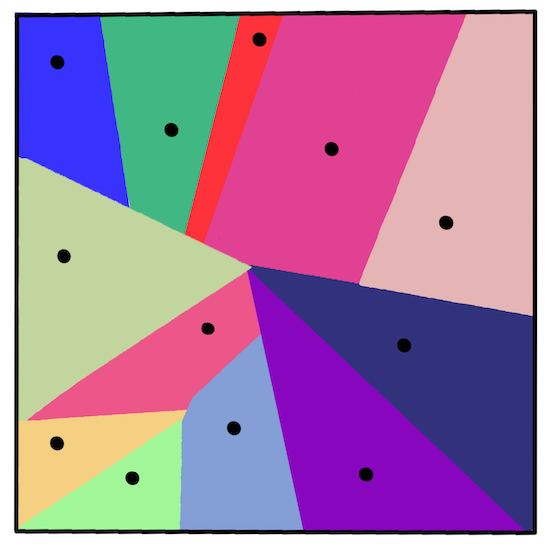

El proceso de agrupamiento K-medias se ejecuta en un proceso de tres pasos:

1. El algoritmo selecciona el k-número de puntos centrales al hacer muestreo del conjunto de datos. Después de esto, se repite:
    * Se asigna cada muestra al centroide más cercano.
    * Se crean nuevos centroides al tomar el valor medio de todas las muestras asignadas a los centroides previos.
    * Luego, se calcula la diferencia entre los centroides nuevos y viejos y se repite hasta que los centroides se estabilizan.

Un inconveniente de usar K-Means incluye el hecho que necesitarás establecer 'k', que es el número de centroides. Afortunadamente el 'método del codo' ayuda a estimar un buen valor inicial para 'k'. Lo probarás en un minuto.

## Prerrequisitos

### Ejercicio - preparación
Comienza por darle otro vistazo a los datos de canciones.

1. Crea un gráfico de caja, llamando a boxplot() para cada columna:

<Axes: xlabel='release_date'>

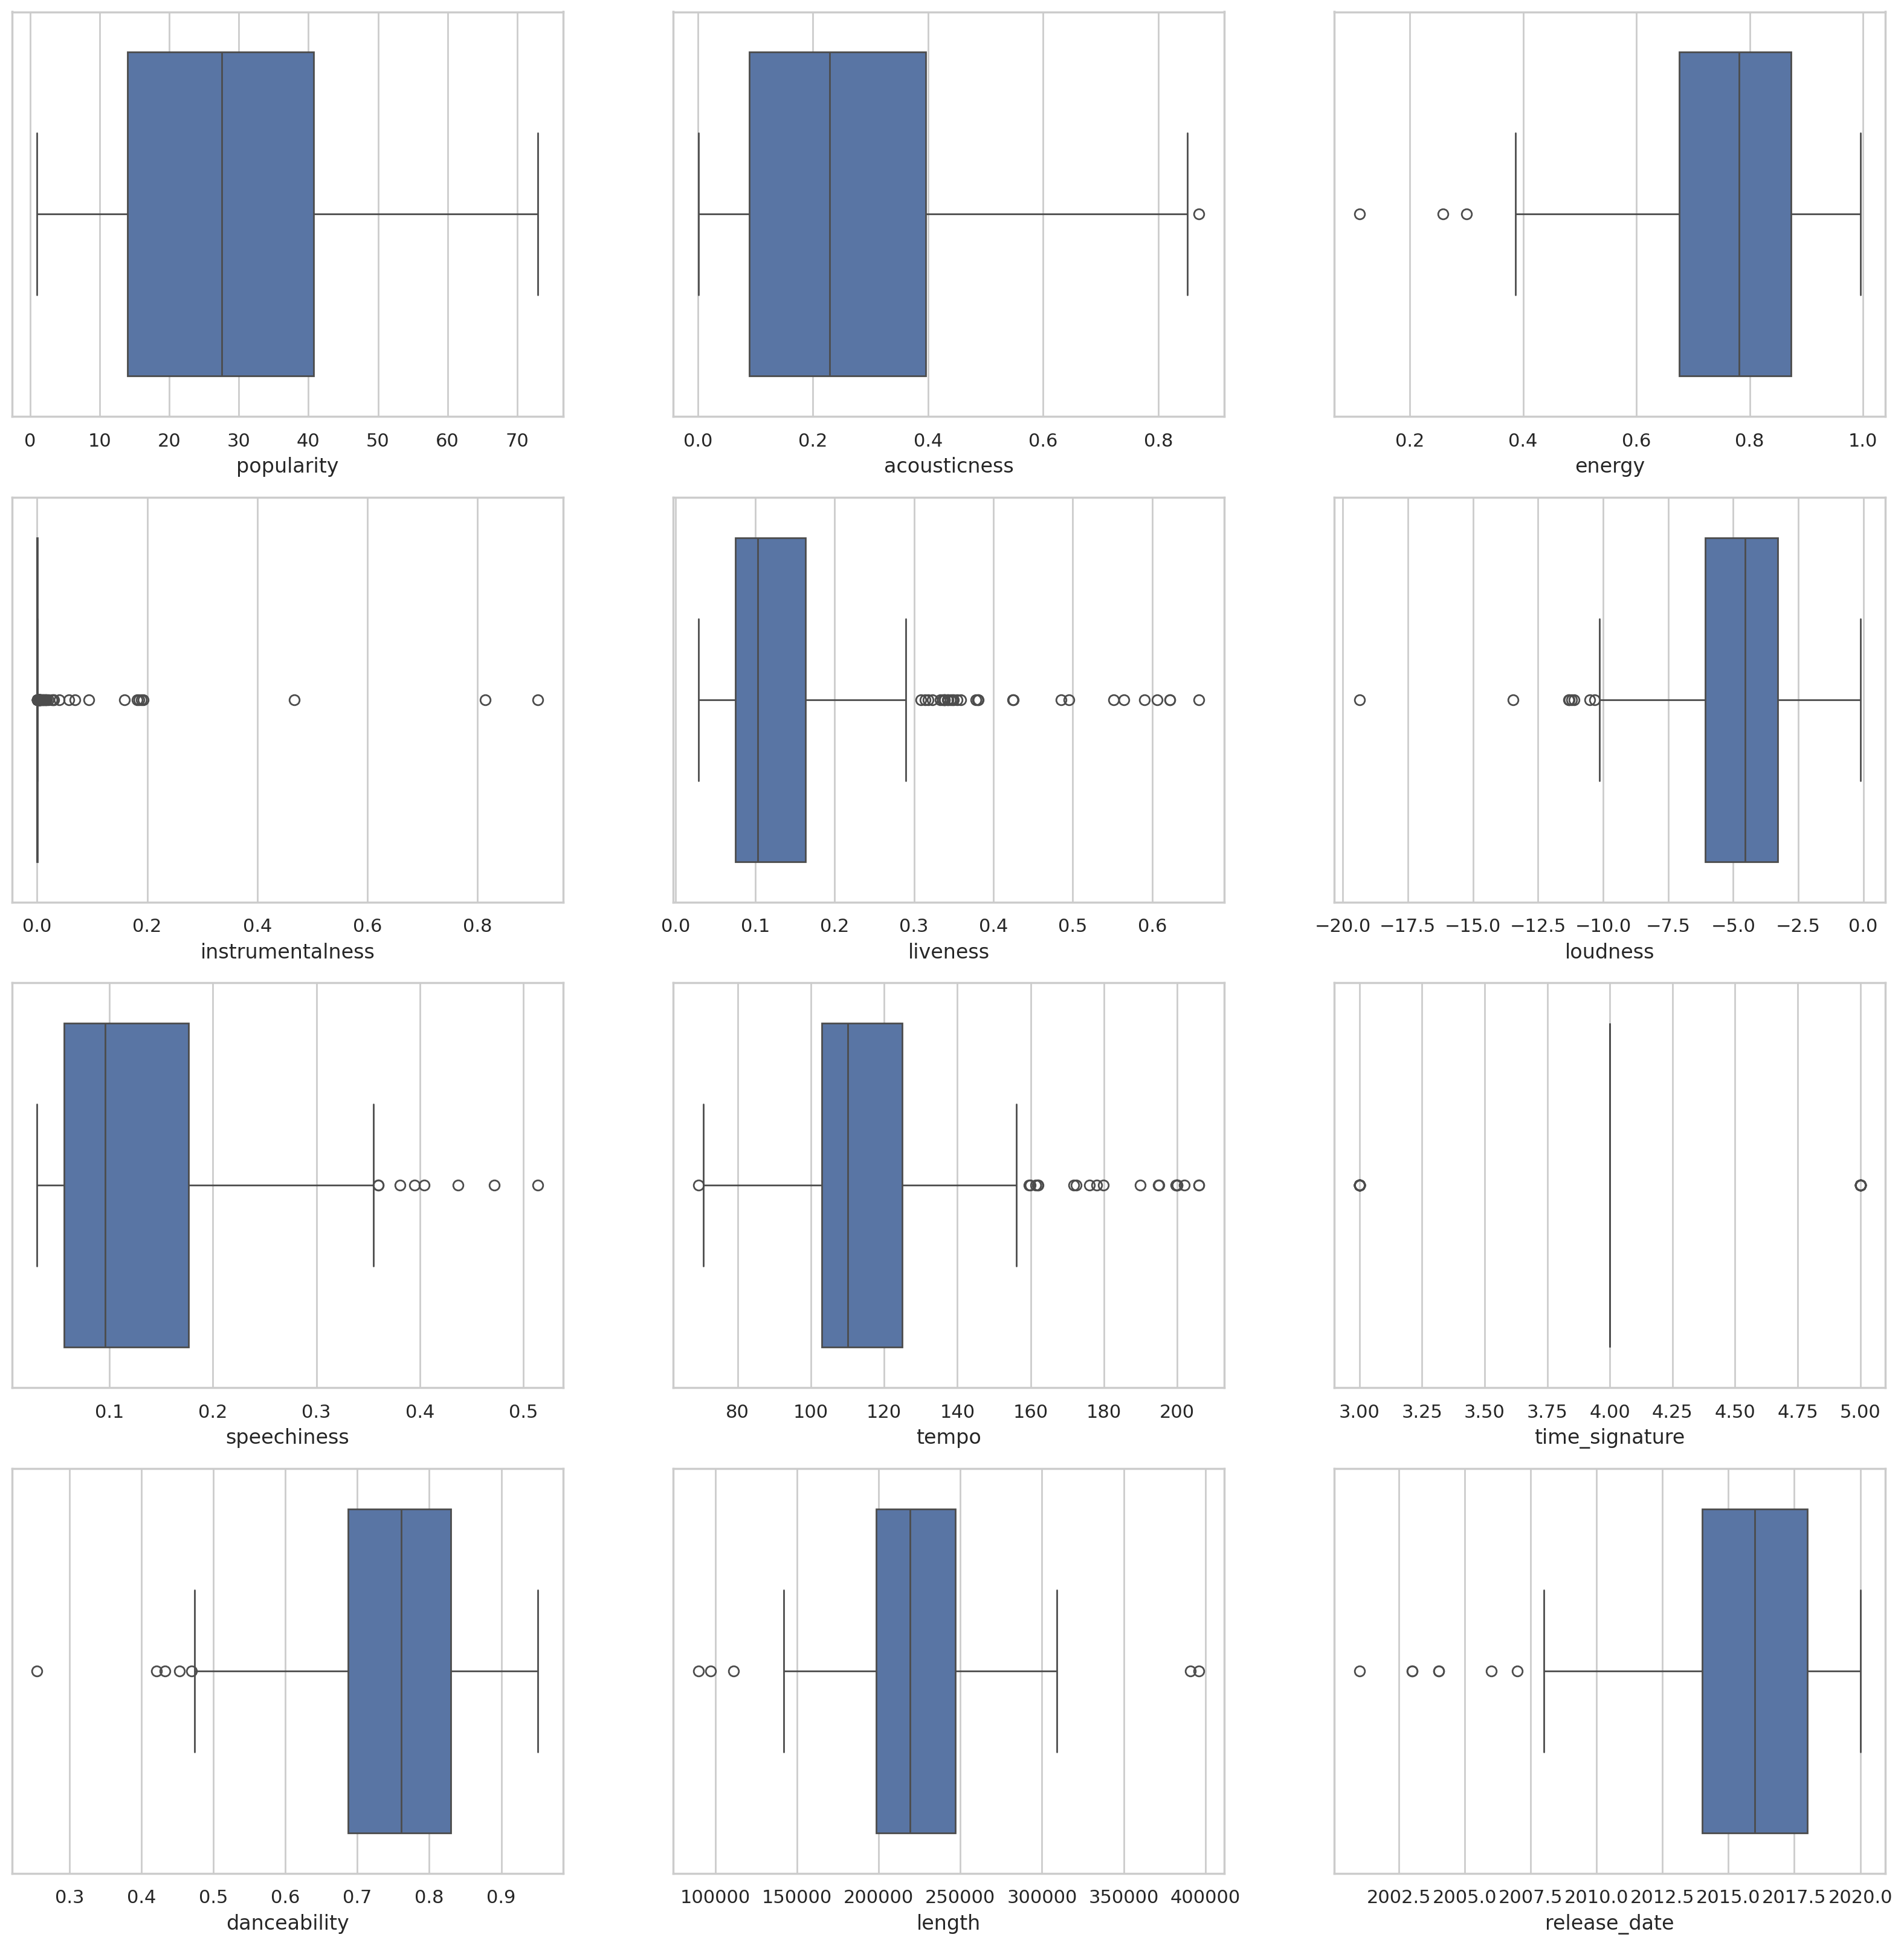

In [4]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Podrías revisar el conjunto de datos y remover estos valores atípicos, pero eso haría que quedara un mínimo de datos.

2. Por ahora, elege qué columnas usarás para tu ejercicio de agrupamiento. Elige unas con rangos similares y codifica la columna `artist_top_genre` como datos numéricos:

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

3. Ahora necesitamos elegir a cuántos grupos apuntar. Sabes que hay 3 géneros de canciones que extrajimos de el conjunto de datos, así que probemos con 3:

In [6]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0],
      dtype=int32)

Tenemos un arreglo impreso con los grupos predichos (0, 1, 0 2) para cada fila del dataframe.

4. Usa este arreglo para calcular una 'puntaje de silueta':

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

## Puntaje de silueta
Buscamos un puntaje de silueta más cercano a 1. Este puntaje varía de -1 a 1, y si el puntaje es 1, el grupo es denso y bien separado de otros grupos. Un valor cercano a 0 representa grupos superpuestos con muestras muy cercanas al límite de decisión de los grupos vecinos. Fuente.

Nuestro puntaje es de .54, justo a la mitad. Esto indica que nuestros datos no son particularmente adecuados para este tipo de agrupamiento, pero continuemos.

### Ejercicio - construye un modelo
1. Importa `KMeans` e inicia el proceso de agrupamiento.

In [8]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


### Método del codo
Anteriormente, supimos que, porque hemos apuntado a 3 géneros de canciones, deberías elegir 3 grupos. ¿Pero es el caso?

1. Usa el 'método del codo' para asegurarte.

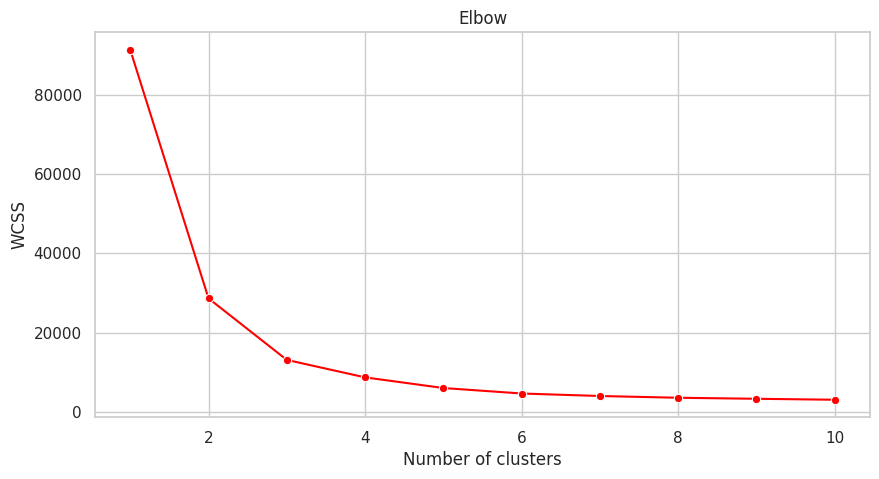

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Ejercicio - muestra los grupos
1. Probemos el proceso de nuevo, esta vez configurando 3 grupos, y muestra los grupos como un gráfico de dispersión:

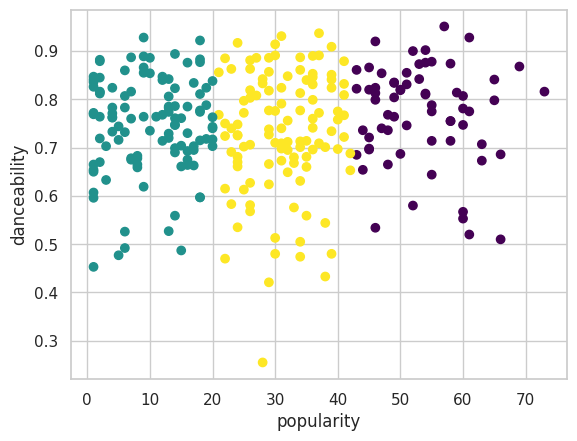

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels, cmap='viridis')
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [11]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 69 out of 286 samples were correctly labeled.
Accuracy score: 0.24


La precisión de este modelo no es tan buena, y la forma de los grupos te dará una pista del por qué.

Estos datos están demasiado desequilibrados, muy poco correlacionados y tienen demasiada varianza entre los valores de columna para agrupar bien. De hecho, los grupos que forman están probablemente fuertemente influenciados o sesgados por las tres categorías de géneros que definimos arriba. ¡Eso fue un proceso de aprendizaje!

En la documentación de Scikit-learn, puedes ver que un modelo como este, con grupos no muy bien demarcados, tienen un problema de 'varianza':
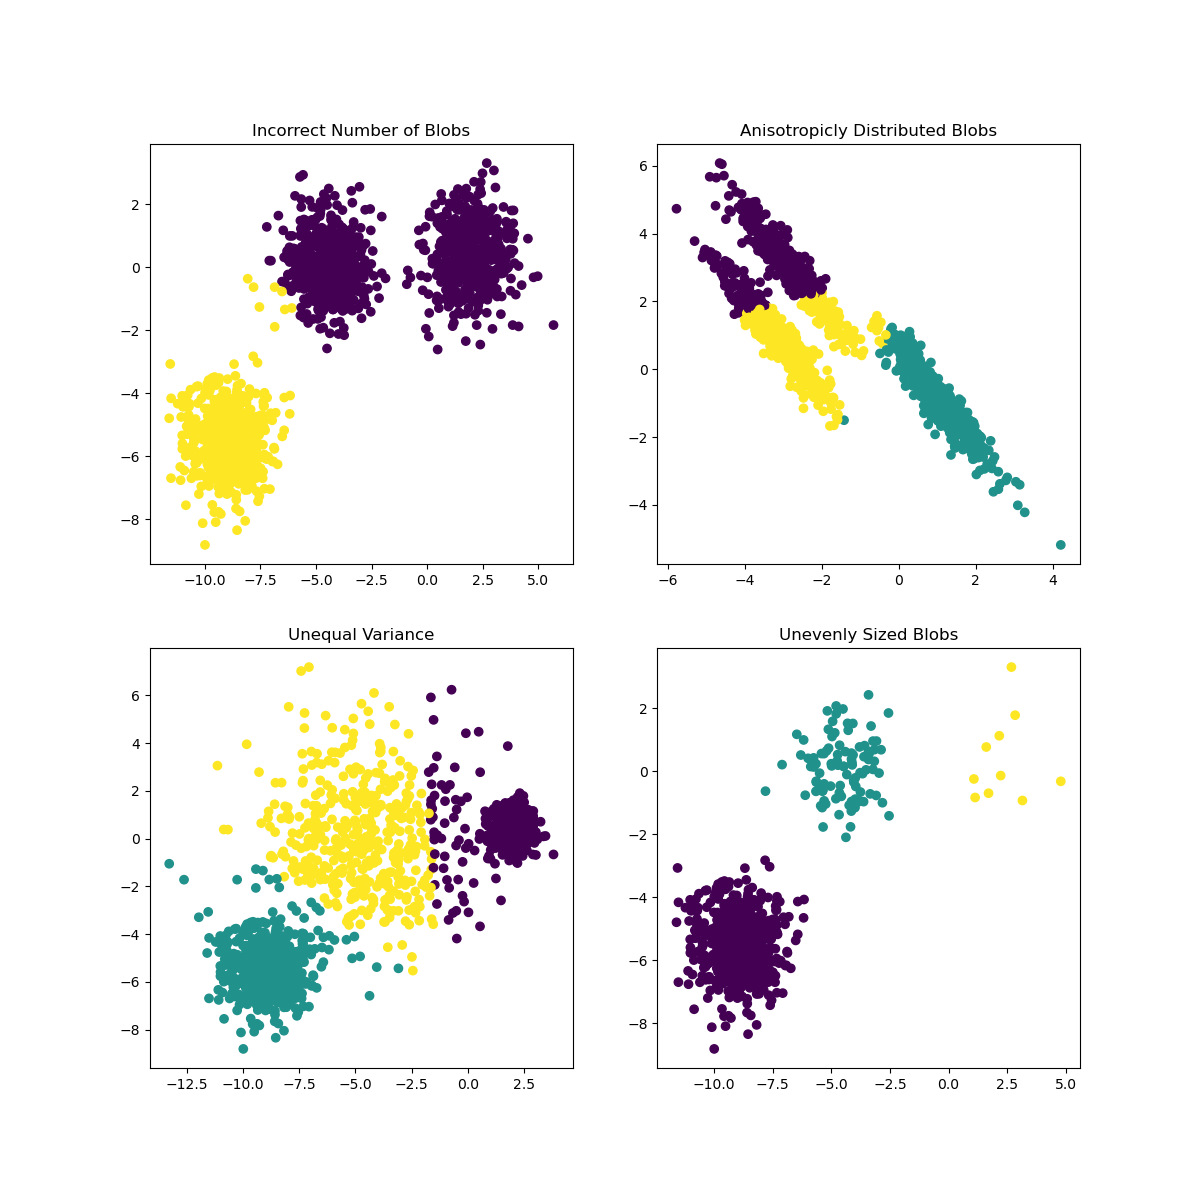

## Varianza
La varianza se define como "el promedio de diferencias cuadráticas de la media". Fuente. En el contexto de este problema de agrupamiento, se refiere a los datos en los que los números de nuestro conjunto de datos tienden a divergir demasiado de la media.

✅ Este es un buen momento para pensar acerca de todas las formas en que podrías corregir este problema. ¿Modificar los datos un poco más? 'Usar columnas distintas? ¿Usar un algoritmo diferente? Intenta escalando tus datos para normalizarlos y probar otras columnas.